# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import KNNImputer
#from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
#from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (accuracy_score, classification_report,ConfusionMatrixDisplay,
                             confusion_matrix, SCORERS)

# utilities

In [2]:
def give_learning_curve(model,X_train,y_train, scoring= 'f1_macro'):
    n, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train,
                                               cv=5, 
                                               train_sizes=np.linspace(0.1, 1, 10), 
                                               scoring=scoring)

    lc = pd.DataFrame({'n': n,
                      'train score': train_score.mean(axis=1),
                      'test score': val_score.mean(axis=1)})
    display(lc)
    # plot:
    
    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve')
    
    plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
    plt.plot(n, val_score.mean(axis=1), label='test score', color='green')
    
    plt.xlabel('n rows')
    plt.ylabel(scoring)
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
    pass



def give_confusion_report(model,X_test,y_test):
    
    pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, pred_test)
    
    CM = ConfusionMatrixDisplay(confusion_matrix=cm)
    CM.plot()
    plt.show()
    
    print(classification_report(y_test,pred_test))
    pass 


def give_f_imp(model, X_train):

    f_importance = pd.DataFrame({'feature_names': X_train.columns,
                                 'importance': model.feature_importances_})
    display(f_importance)

    plt.figure(figsize=(8, 5))
    plt.title('Feature importance')
    sns.barplot(data=f_importance, x='feature_names', y='importance')
    plt.xticks(rotation='vertical')
    plt.show()
    pass

In [3]:
data = pd.read_csv('mushrooms_eda.csv')


data

,class,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,...,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods,is_edible
0,poisonous,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,False
1,edible,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,True
2,edible,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,True
3,poisonous,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,False
4,edible,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,True
8120,edible,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,True
8121,edible,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,True
8122,poisonous,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,False


# Preprocessing

In [4]:
data2 = data.copy().drop(columns=['is_edible'])

In [5]:
#X = data.drop(columns='species')
#y = data['target']

X = data2.copy()
y = X.pop('class')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, # 0.25 
                                                    random_state=4) # 4 arbirary , can be any integer
print(X_train.shape)
X_test.shape


(6093, 117)


(2031, 117)

In [6]:
display(X_train)

,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,cap-surface__smooth,...,population__scattered,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods
6813,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1189,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5437,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3728,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5694,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
709,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2487,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
174,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


# fit

<br>

## DT, max_depth = 2 

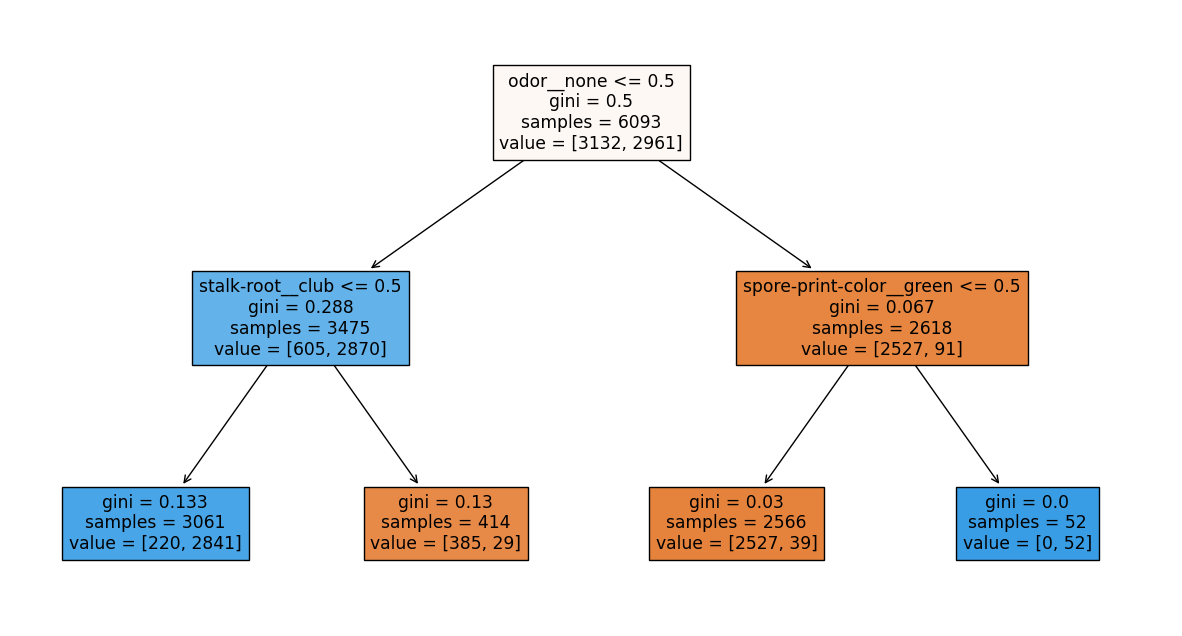

In [7]:
model = DecisionTreeClassifier(max_depth = 2) 

model.fit(X_train,y_train)

plt.figure(figsize=(15, 8))

plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()


,feature_names,importance
0,cap-shape__bell,0.0
1,cap-shape__conical,0.0
2,cap-shape__convex,0.0
3,cap-shape__flat,0.0
4,cap-shape__knobbed,0.0
...,...,...
112,habitat__meadows,0.0
113,habitat__paths,0.0
114,habitat__urban,0.0
115,habitat__waste,0.0


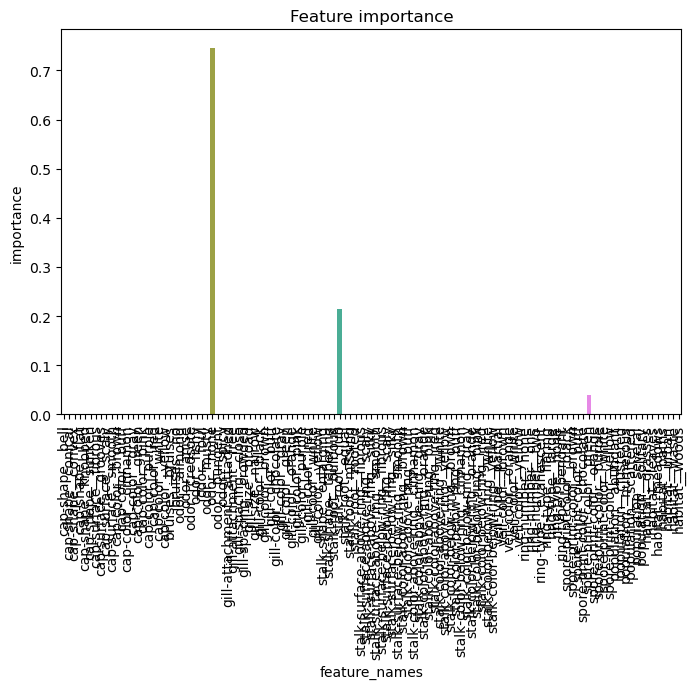

In [8]:
give_f_imp(model,X_train)

In [9]:
y_pred = model.predict(X_test)

score = accuracy_score(y_test,y_pred)

In [10]:
print(score)

0.9586410635155096


,n,train score,test score
0,487,0.953593,0.943377
1,974,0.950308,0.943213
2,1462,0.937756,0.943217
3,1949,0.951154,0.943706
4,2437,0.934838,0.936318
5,2924,0.936320,0.936318
6,3411,0.945764,0.946335
7,3899,0.946499,0.946335
8,4386,0.952485,0.952733
9,4874,0.952729,0.952733


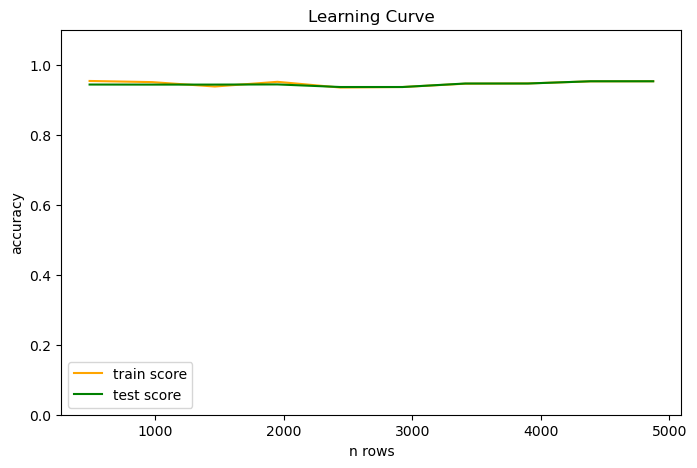

In [11]:
give_learning_curve(model, X_train,y_train, scoring='accuracy')

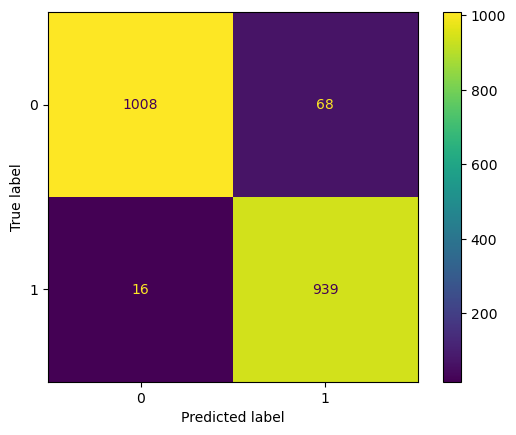

              precision    recall  f1-score   support

      edible       0.98      0.94      0.96      1076
   poisonous       0.93      0.98      0.96       955

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [12]:
give_confusion_report(model,X_test, y_test)

## DT, max_depth = 11 

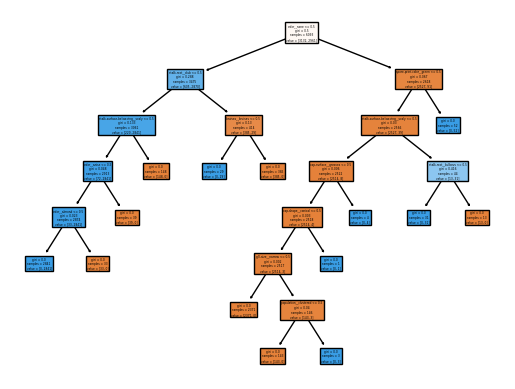

In [13]:
model_1 = DecisionTreeClassifier(max_depth = 11) 

model_1.fit(X_train,y_train)

#plt.figure(figsize=(15, 8))

plot_tree(model_1,
          feature_names=X_train.columns,
          filled=True)
plt.show()


,feature_names,importance
0,cap-shape__bell,0.000000
1,cap-shape__conical,0.000655
2,cap-shape__convex,0.000000
3,cap-shape__flat,0.000000
4,cap-shape__knobbed,0.000000
...,...,...
112,habitat__meadows,0.000000
113,habitat__paths,0.000000
114,habitat__urban,0.000000
115,habitat__waste,0.000000


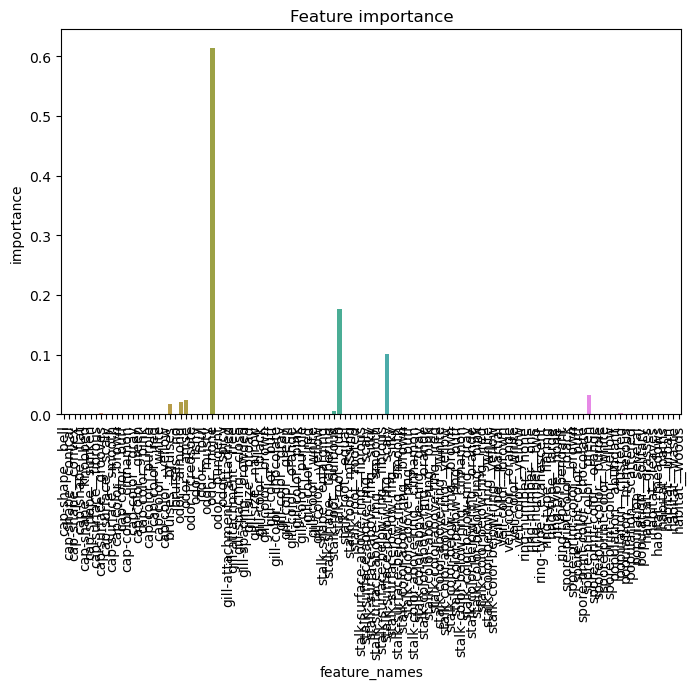

In [14]:
give_f_imp(model_1,X_train)

,n,train score,test score
0,487,1.0,0.994092
1,974,1.0,0.998687
2,1462,1.0,1.000000
3,1949,1.0,0.999015
4,2437,1.0,0.999343
5,2924,1.0,0.999836
6,3411,1.0,0.999836
7,3899,1.0,0.999836
8,4386,1.0,0.999836
9,4874,1.0,1.000000


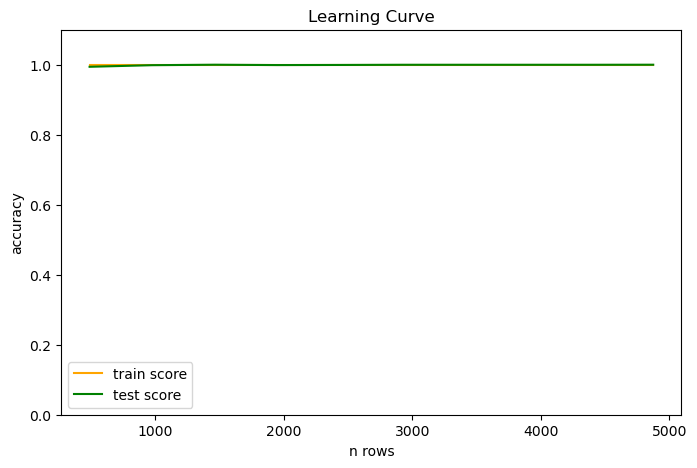

In [15]:
give_learning_curve(model_1, X_train,y_train, 'accuracy')

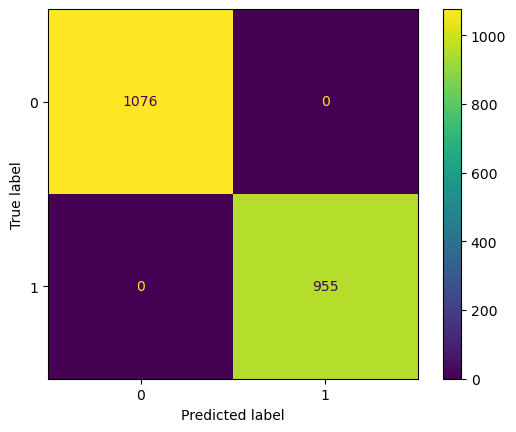

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1076
   poisonous       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [16]:
give_confusion_report(model_1,X_test, y_test)

# Metrics doc:

[ https://scikit-learn.org/stable/modules/model_evaluation.html ]

# code

In [17]:
n, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train,
                                               cv=5, 
                                               train_sizes=np.linspace(0.1, 1, 10), 
                                               scoring='f1_macro')

In [18]:
n

array([ 487,  974, 1462, 1949, 2437, 2924, 3411, 3899, 4386, 4874])

In [19]:
train_score

array([[0.96474996, 0.9504006 , 0.9504006 , 0.9504006 , 0.9504006 ],
       [0.95657104, 0.94850702, 0.94850702, 0.94850702, 0.94850702],
       [0.92797026, 0.91828808, 0.94730873, 0.94730873, 0.94730873],
       [0.95330934, 0.95022958, 0.95065875, 0.95065875, 0.95065875],
       [0.95527044, 0.95280546, 0.92200198, 0.92120458, 0.92120458],
       [0.95588086, 0.95382699, 0.92235379, 0.92372416, 0.92372416],
       [0.95279936, 0.95103939, 0.9227421 , 0.95074754, 0.95074754],
       [0.95229538, 0.95075606, 0.92465734, 0.95101204, 0.95306211],
       [0.95462834, 0.95326031, 0.95006809, 0.95348813, 0.95097568],
       [0.95486125, 0.95363088, 0.95075883, 0.95383645, 0.95055386]])

In [20]:
val_score

array([[0.94257399, 0.94748519, 0.93600791, 0.9326649 , 0.95073241],
       [0.94257275, 0.94830702, 0.94009534, 0.94169636, 0.94332955],
       [0.91613176, 0.92790792, 0.96062216, 0.94827415, 0.961409  ],
       [0.94421473, 0.9491386 , 0.94009534, 0.94169636, 0.94332955],
       [0.94421473, 0.9491386 , 0.92790792, 0.93206029, 0.92617654],
       [0.94421473, 0.9491386 , 0.92790792, 0.93206029, 0.92617654],
       [0.94421473, 0.9491386 , 0.92790792, 0.94827415, 0.961409  ],
       [0.94421473, 0.9491386 , 0.92790792, 0.94827415, 0.961409  ],
       [0.94421473, 0.9491386 , 0.96062216, 0.94827415, 0.961409  ],
       [0.94421473, 0.9491386 , 0.96062216, 0.94827415, 0.961409  ]])

## with cross validation

In [21]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,10,3)}

scoring = 'f1_macro'#'accuracy' # f1_macro, precision_macro, recall_macro

grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=params
                    ,scoring=scoring)

grid.fit(X_train,y_train)

model = grid.best_estimator_
score = grid.best_score_

display(model)
print(score)



RandomForestClassifier(max_depth=7, min_samples_leaf=2)

1.0


In [22]:
display(X_train)

,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,cap-surface__smooth,...,population__scattered,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods
6813,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1189,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5437,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3728,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5694,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
709,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2487,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
174,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


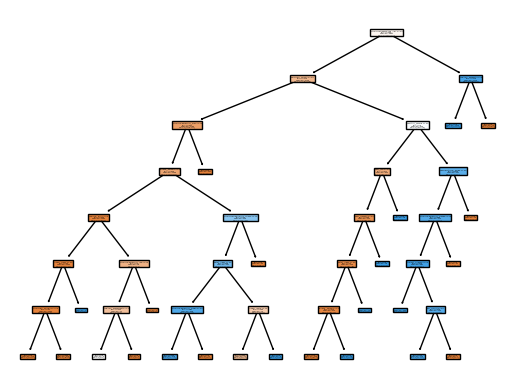

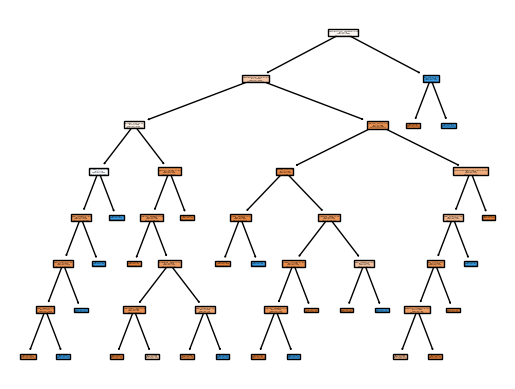

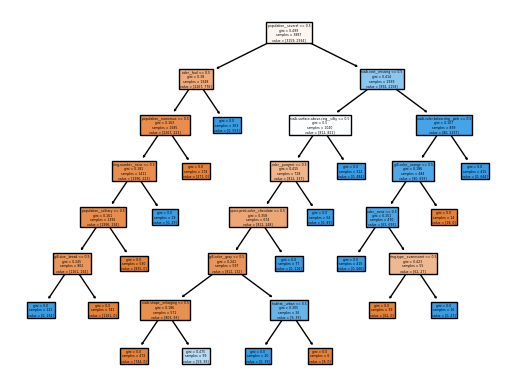

In [23]:


plot_tree(model[0],
          feature_names=X_train.columns,
          filled=True)
plt.show()

plot_tree(model[1],
          feature_names=X_train.columns,
          filled=True)
plt.show()

plot_tree(model[2],
          feature_names=X_train.columns,
          filled=True)
plt.show()



,feature_names,importance
0,cap-shape__bell,0.002130
1,cap-shape__conical,0.000026
2,cap-shape__convex,0.000699
3,cap-shape__flat,0.000380
4,cap-shape__knobbed,0.000008
...,...,...
112,habitat__meadows,0.002429
113,habitat__paths,0.003202
114,habitat__urban,0.008620
115,habitat__waste,0.001480


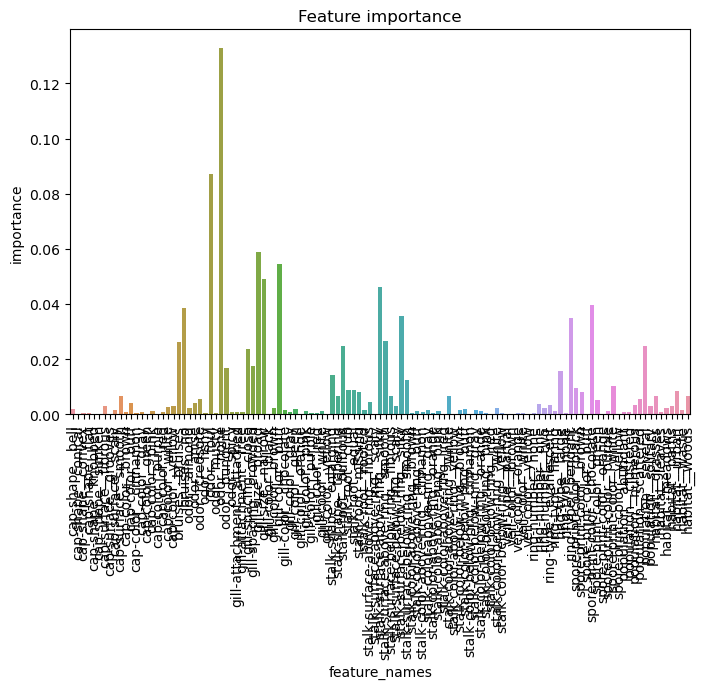

,n,train score,test score
0,487,0.997529,0.993097
1,974,0.999178,0.996878
2,1462,0.999316,0.998357
3,1949,0.999384,0.997864
4,2437,0.999425,0.998522
5,2924,0.999932,0.999672
6,3411,0.999765,0.999343
7,3899,0.999846,0.999836
8,4386,0.999954,1.000000
9,4874,1.000000,1.000000


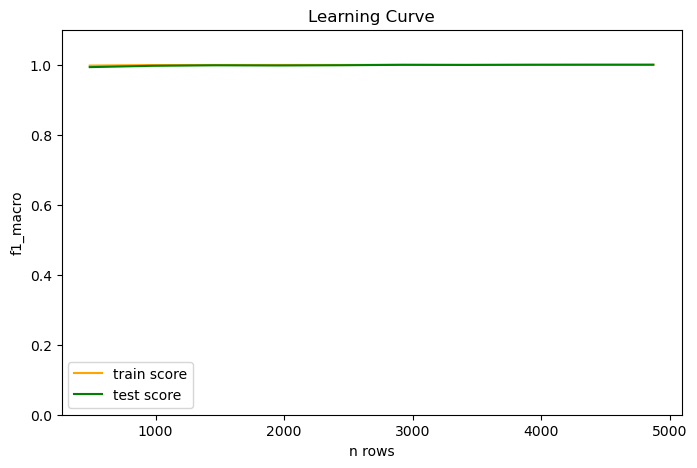

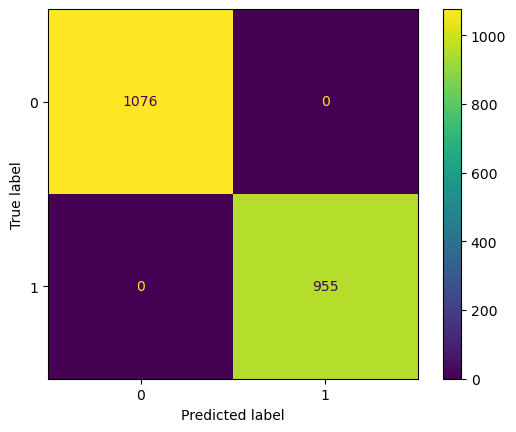

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1076
   poisonous       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [24]:
give_f_imp(model,X_train)

give_learning_curve(model,X_train,y_train,scoring=scoring)

give_confusion_report(model,X_test,y_test)

In [25]:
import pickle

In [26]:
pickle.dump(model, open('model.pkl','wb')) #exporter 'model' sur le disque dur

In [27]:
display(X_train)

,cap-shape__bell,cap-shape__conical,cap-shape__convex,cap-shape__flat,cap-shape__knobbed,cap-shape__sunken,cap-surface__fibrous,cap-surface__grooves,cap-surface__scaly,cap-surface__smooth,...,population__scattered,population__several,population__solitary,habitat__grasses,habitat__leaves,habitat__meadows,habitat__paths,habitat__urban,habitat__waste,habitat__woods
6813,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1189,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5437,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3728,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5694,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
709,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2487,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
174,0,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0


In [28]:
for c in X_train:
    if c=='is_edible':
        print(c)

In [30]:
f_importance = pd.DataFrame({'feature_names': X_train.columns,'importance': model.feature_importances_})

In [35]:
important_extract = f_importance.sort_values(by='importance', ascending=False).head(20)

In [42]:
# Identifiy 10 most important features
important_extract['feature_names'].apply(lambda x : str.split(x, sep='__')[0]).unique()[0:10]

array(['odor', 'gill-size', 'gill-color', 'stalk-surface-above-ring',
       'spore-print-color', 'bruises', 'stalk-surface-below-ring',
       'ring-type', 'population', 'stalk-root'], dtype=object)